#### Loading Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as rsc
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pgeocode
import plotly.express as px
import pandas as pd

import pgeocode
import plotly.express as px
import seaborn as sns

In [2]:
#read json file
df = pd.read_json('location_task_no_nulls.json')

In [3]:
df.tail(100)

,order_id,order_value,order_items_count,customer_id,created_timestamp_local,has_instruction,logistics_dropoff_distance,delivery_postal_code,delivery_geohash_precision8,has_phone_number,has_call_instruction,has_leave_instruction,has_lift_instruction,has_lobby_instruction,has_gate_instruction,has_knock_instruction,has_bell_instruction
2964338,y9zp-vfj6,75.10,9,sgzcrij1,2021-03-16T20:33:13,True,43.265250,118668,w21z3db0,True,True,False,False,False,True,False,False
2964339,y2sf-5w84,38.47,9,sgwdr2uj,2021-03-29T19:54:18,True,33.593769,640528,w21z8jkq,True,True,False,False,False,False,False,False
2964340,b8ds-w1xd,49.40,9,v3frb3gj,2021-03-17T01:34:11,True,80.306405,542164,w21zukyz,False,True,False,False,False,False,False,False
2964341,x1lt-wyw0,20.40,9,s9pzy8om,2021-03-21T22:30:00,True,30.700605,219053,w21z7py8,False,True,False,False,False,False,False,False
2964342,o4gc-1z6z,178.33,9,b6hsu3uh,2021-03-10T22:42:56,True,23.718257,138522,w21z3u8k,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964434,x8yk-i47h,52.25,9,sgoaf8gi,2021-03-08T11:00:31,True,52.579262,760709,w23b4shg,True,True,False,False,False,False,False,False
2964435,x1sy-lx5r,40.90,9,d1wdv0nu,2021-03-05T08:45:19,True,28.240697,752469,w23b4rds,True,True,False,False,False,False,False,False
2964436,y5qw-ysmi,27.95,9,b0xww0xs,2021-03-27T14:01:28,True,95.709786,521247,w21ztq5v,False,True,False,False,False,False,False,False
2964437,w6zq-rog9,16.00,9,r2hxi4hb,2021-03-04T17:24:34,True,8.457068,753128,w23b4ycr,False,True,False,False,False,False,True,False


In [4]:
#copy to another dataframe so that original data remain intact
delivery = df

#### Explorig data

In [5]:
delivery.describe()

,order_value,order_items_count,logistics_dropoff_distance
count,2.593799e+06,2.593799e+06,2.593799e+06
mean,2.107854e+01,2.607097e+00,9.353974e+01
std,1.600306e+01,1.975311e+00,1.652489e+04
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.150000e+01,1.000000e+00,2.167244e+01
50%,1.675000e+01,2.000000e+00,3.798452e+01
75%,2.515000e+01,3.000000e+00,6.368662e+01
max,8.723500e+02,6.100000e+01,1.532825e+07


In [6]:
# encoding the categorical variables
label = preprocessing.LabelEncoder()
delivery['has_instruction']= label.fit_transform(delivery['has_instruction']) 
delivery['has_phone_number']= label.fit_transform(delivery['has_phone_number'])
delivery['has_call_instruction']= label.fit_transform(delivery['has_call_instruction'])
delivery['has_leave_instruction']= label.fit_transform(delivery['has_leave_instruction'])
delivery['has_lift_instruction']= label.fit_transform(delivery['has_lift_instruction'])
delivery['has_lobby_instruction']= label.fit_transform(delivery['has_lobby_instruction'])
delivery['has_gate_instruction']= label.fit_transform(delivery['has_gate_instruction'])
delivery['has_knock_instruction']= label.fit_transform(delivery['has_knock_instruction'])
delivery['has_bell_instruction']= label.fit_transform(delivery['has_bell_instruction'])

In [7]:
#checking for nulls
print (delivery.isnull().sum())

order_id                       0
order_value                    0
order_items_count              0
customer_id                    0
created_timestamp_local        0
has_instruction                0
logistics_dropoff_distance     0
delivery_postal_code           0
delivery_geohash_precision8    0
has_phone_number               0
has_call_instruction           0
has_leave_instruction          0
has_lift_instruction           0
has_lobby_instruction          0
has_gate_instruction           0
has_knock_instruction          0
has_bell_instruction           0
dtype: int64


In [8]:
#some null values found in postal code
delivery.isna().sum()

order_id                       0
order_value                    0
order_items_count              0
customer_id                    0
created_timestamp_local        0
has_instruction                0
logistics_dropoff_distance     0
delivery_postal_code           0
delivery_geohash_precision8    0
has_phone_number               0
has_call_instruction           0
has_leave_instruction          0
has_lift_instruction           0
has_lobby_instruction          0
has_gate_instruction           0
has_knock_instruction          0
has_bell_instruction           0
dtype: int64

In [9]:
#unique postal code
len(delivery['delivery_postal_code'].unique())

47891

In [10]:
# maximum order item count
delivery['order_items_count'].max()

61

In [11]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593799 entries, 618 to 2964438
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   order_id                     object 
 1   order_value                  float64
 2   order_items_count            int64  
 3   customer_id                  object 
 4   created_timestamp_local      object 
 5   has_instruction              int64  
 6   logistics_dropoff_distance   float64
 7   delivery_postal_code         object 
 8   delivery_geohash_precision8  object 
 9   has_phone_number             int64  
 10  has_call_instruction         int64  
 11  has_leave_instruction        int64  
 12  has_lift_instruction         int64  
 13  has_lobby_instruction        int64  
 14  has_gate_instruction         int64  
 15  has_knock_instruction        int64  
 16  has_bell_instruction         int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 356.2+ MB


In [12]:
delivery['created_timestamp_local'] = pd.to_datetime(delivery['created_timestamp_local'])

In [13]:
delivery['Day_of_Delivery'] = delivery['created_timestamp_local'].dt.day_name()
delivery['hour'] = delivery['created_timestamp_local'].dt.hour
delivery['Time_of_Delivery'] = delivery['created_timestamp_local'].dt.time.astype(str)
delivery['Week'] = delivery['created_timestamp_local'].dt.week


intervals = ['0','11','14','19','24']
labels = ["Morning", 'Afternoon','Evening','Night']
delivery['DeliveryIntervals'] = pd.cut(delivery['Time_of_Delivery'], intervals, labels=labels)

C:\Users\Awani\AppData\Local\Temp/ipykernel_12092/2601714804.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  delivery['Week'] = delivery['created_timestamp_local'].dt.week


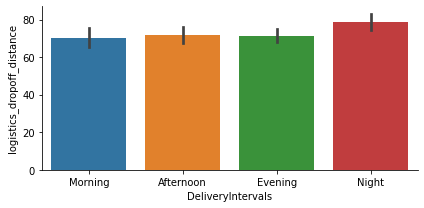

In [14]:
# Factorplot Delivery Time Intervals and Drop-off Distance
sns.catplot(x="DeliveryIntervals", y="logistics_dropoff_distance", data=delivery.sample(100000), kind="bar", height=3, aspect=2)

In [15]:
#looking for ideal cases of zero drop-off
zero_drop_off = delivery[delivery['logistics_dropoff_distance'] == 0]
zero_drop_off

,order_id,order_value,order_items_count,customer_id,created_timestamp_local,has_instruction,logistics_dropoff_distance,delivery_postal_code,delivery_geohash_precision8,has_phone_number,...,has_lift_instruction,has_lobby_instruction,has_gate_instruction,has_knock_instruction,has_bell_instruction,Day_of_Delivery,hour,Time_of_Delivery,Week,DeliveryIntervals
8108,x3yr-mv3i,15.21,12,sgxrk7tx,2021-03-23 19:06:35,1,0.0,247965,w21z67hr,0,...,0,1,0,0,1,Tuesday,19,19:06:35,12,Night
10139,m1sa-8fyx,31.30,12,e2fdd0lt,2021-03-05 11:52:36,1,0.0,573910,w21zenjy,0,...,0,0,0,0,0,Friday,11,11:52:36,9,Afternoon
15554,e8jn-wrx2,35.05,11,sgzhl4ap,2021-03-04 12:52:05,1,0.0,560302,w21zg0f5,0,...,0,0,0,0,0,Thursday,12,12:52:05,9,Afternoon
224900,v9oj-10cu,13.05,1,sgscbet7,2021-03-07 14:01:36,1,0.0,,w21z3px7,0,...,0,0,0,0,0,Sunday,14,14:01:36,9,Evening
227965,s7ah-000g,9.50,1,x8ran0pb,2021-03-23 11:41:10,1,0.0,103070,w21z622b,0,...,0,0,0,0,0,Tuesday,11,11:41:10,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732979,x8hu-pdi8,37.70,5,k8dhu2qg,2021-03-29 18:14:29,1,0.0,311139,w21ze52b,0,...,0,0,0,0,0,Monday,18,18:14:29,13,Evening
2792247,oycp-96ro,11.10,5,sgfwqzl8,2021-03-29 14:18:17,0,0.0,150050,w21z663q,0,...,0,0,0,0,0,Monday,14,14:18:17,13,Evening
2803644,x5ns-l6fp,23.89,5,h8sfn1fj,2021-03-14 19:10:27,1,0.0,100069,w21z620r,0,...,0,0,0,0,0,Sunday,19,19:10:27,10,Night
2916369,kiv8-x9qx,31.00,7,c5xqp5qj,2021-03-12 10:59:30,0,0.0,101091,w21z60mv,0,...,0,0,0,0,0,Friday,10,10:59:30,10,Morning


In [16]:
#monday has highest 0 logistics_dropoff_distance
zero_drop_off['Day_of_Delivery'].value_counts()

Monday       22
Sunday       17
Saturday     14
Friday       13
Tuesday      10
Thursday      8
Wednesday     5
Name: Day_of_Delivery, dtype: int64

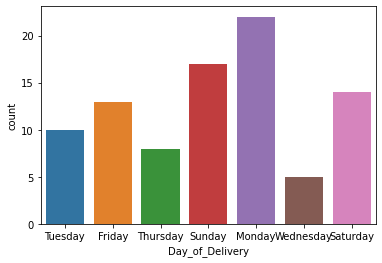

In [17]:
ax = sns.countplot(x="Day_of_Delivery", data=zero_drop_off)

In [18]:
#Afternoon has highest 0 logistics_dropoff_distance
zero_drop_off['DeliveryIntervals'].value_counts()

Afternoon    42
Night        21
Evening      19
Morning       7
Name: DeliveryIntervals, dtype: int64

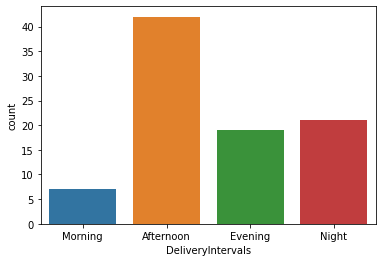

In [19]:
ax = sns.countplot(x="DeliveryIntervals", data=zero_drop_off)

In [20]:
# Outlier detection function < and > than -+ 1.5 IQR 

def filter_outlier(ol):
    Q1 = ol.quantile(0.35)
    Q3 = ol.quantile(0.70)
    IQR = Q3-Q1
    newdf = ol[~((ol < (Q1 - 1.5* IQR)) |(ol > (Q3 + 1.5 * IQR))).any(axis=1)]
    return newdf

In [21]:
# drop outliers for drop-off distance
remove_outlier = filter_outlier(delivery[['logistics_dropoff_distance']])

In [22]:
mask = delivery.index.intersection(remove_outlier.index)

In [23]:
delivery = delivery.loc[mask]

<AxesSubplot:>

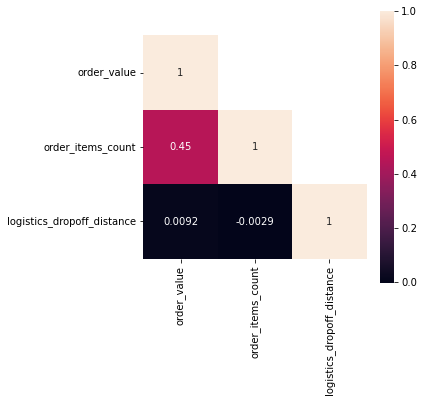

In [24]:
#Observed some correlation between order count and order value. But no significant correlation with logistic_dropoff_distance
cor_d = delivery[["order_value", "order_items_count", "logistics_dropoff_distance"]]

cor_mat= cor_d.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(5,5)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

In [25]:
# delivery_geohash_precision8 is difficult to categorise , hence converted to geohash precision level of 5 
delivery['delivery_geohash_precision5'] = delivery['delivery_geohash_precision8'].str[:5]

In [26]:
len(delivery['delivery_geohash_precision5'].unique())

37

In [27]:
delivery['delivery_geohash_precision5']= label.fit_transform(delivery['delivery_geohash_precision5']) 

In [28]:
delivery['delivery_geohash_precision5']

618        36
619        25
620        13
621        19
622        10
           ..
2964434    32
2964435    32
2964436    24
2964437    32
2964438    11
Name: delivery_geohash_precision5, Length: 2323583, dtype: int32

In [29]:
# assigned independent and target variable
X = delivery[['has_instruction', 'has_phone_number', 'has_call_instruction', 'has_leave_instruction', 
              'has_lift_instruction', 'has_lobby_instruction', 'has_gate_instruction', 'has_knock_instruction', 
              'has_bell_instruction', 'order_value', 'order_items_count', 'delivery_geohash_precision5']]

y = delivery["logistics_dropoff_distance"]

In [30]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
#can considered more parameters but due to system constraints using lesser parameter. considering 2 fold
max_depth = [int(x) for x in np.linspace(20,1000,10)]
parameters={"splitter":["best","random"],
            "max_depth" : max_depth,
            "min_samples_leaf":[3, 4, 5],
            "max_features":["sqrt", "auto"],
            "max_leaf_nodes":[5, 8, 10]}

# Modelling 
df_grid_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters,cv=2,verbose=3)

# Model Fitting
df_grid_reg.fit(X_train, y_train)

# Predictions
dtm_train = df_grid_reg.predict(X_train)
dtm_pred = df_grid_reg.predict(X_test)

Fitting 2 folds for each of 360 candidates, totalling 720 fits
[CV 1/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.001 total time=   1.3s
[CV 2/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.001 total time=   1.0s
[CV 1/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.8s
[CV 2/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.9s
[CV 1/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=best;, score=0.000 total time=   1.0s
[CV 2/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=best;, score=0.000 total time=   1.3s
[CV 1/2] END max_depth=20, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=random;, score=0.001 total time=   0.9s
[CV 2/2] END m

[CV 1/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.001 total time=   2.1s
[CV 2/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.002 total time=   2.3s
[CV 1/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.003 total time=   3.3s
[CV 2/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.003 total time=   3.2s
[CV 1/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=0.001 total time=   2.1s
[CV 2/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=0.002 total time=   1.7s
[CV 1/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.8s
[CV 2/2] END max_depth=20, max_features=auto, max_leaf_nodes=10, min

[CV 1/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=best;, score=0.003 total time=   2.9s
[CV 2/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=best;, score=0.003 total time=   2.8s
[CV 1/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=random;, score=0.002 total time=   1.7s
[CV 2/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=random;, score=0.001 total time=   1.8s
[CV 1/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.7s
[CV 2/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.7s
[CV 1/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.7s
[CV 2/2] END max_depth=128, max_features=auto, max_leaf_nodes=8, min_s

[CV 1/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, splitter=random;, score=0.001 total time=   1.4s
[CV 2/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, splitter=random;, score=0.002 total time=   1.4s
[CV 1/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best;, score=0.002 total time=   2.7s
[CV 2/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best;, score=0.002 total time=   2.4s
[CV 1/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.5s
[CV 2/2] END max_depth=237, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.4s
[CV 1/2] END max_depth=237, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3, splitter=best;, score=0.003 total time=   2.6s
[CV 2/2] END max_depth=237, max_features=auto, max_leaf_nodes=8, min

[CV 1/2] END max_depth=346, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=0.001 total time=   1.1s
[CV 2/2] END max_depth=346, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=0.001 total time=   1.2s
[CV 1/2] END max_depth=346, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.0s
[CV 2/2] END max_depth=346, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.0s
[CV 1/2] END max_depth=346, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.002 total time=   1.8s
[CV 2/2] END max_depth=346, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.002 total time=   1.5s
[CV 1/2] END max_depth=346, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   1.5s
[CV 2/2] END max_depth=346, max_features=auto, max_leaf_nodes=5, m

[CV 1/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=5, splitter=random;, score=0.001 total time=   0.7s
[CV 2/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=5, splitter=random;, score=0.000 total time=   0.9s
[CV 1/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.001 total time=   1.4s
[CV 2/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.001 total time=   1.3s
[CV 1/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.7s
[CV 2/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.5s
[CV 1/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.000 total time=   1.1s
[CV 2/2] END max_depth=455, max_features=sqrt, max_leaf_nodes=1

[CV 1/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=3, splitter=best;, score=0.001 total time=   0.9s
[CV 2/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=3, splitter=best;, score=0.002 total time=   1.1s
[CV 1/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.8s
[CV 2/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.9s
[CV 1/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=4, splitter=best;, score=0.001 total time=   0.6s
[CV 2/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=4, splitter=best;, score=0.001 total time=   0.5s
[CV 1/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=4, splitter=random;, score=0.001 total time=   0.7s
[CV 2/2] END max_depth=564, max_features=sqrt, max_leaf_nodes=8, min_s

[CV 1/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.9s
[CV 2/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   0.8s
[CV 1/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=best;, score=0.001 total time=   1.1s
[CV 2/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=best;, score=0.001 total time=   1.2s
[CV 1/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=random;, score=0.001 total time=   0.8s
[CV 2/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, splitter=random;, score=0.001 total time=   0.9s
[CV 1/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best;, score=0.001 total time=   1.3s
[CV 2/2] END max_depth=673, max_features=sqrt, max_leaf_nodes=5, min

[CV 1/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.003 total time=   2.2s
[CV 2/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.003 total time=   2.2s
[CV 1/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=0.003 total time=   1.7s
[CV 2/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=0.002 total time=   1.4s
[CV 1/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.2s
[CV 2/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.2s
[CV 1/2] END max_depth=673, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.4s
[CV 2/2] END max_depth=673, max_features=auto, max_leaf_nodes=1

[CV 1/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=random;, score=0.001 total time=   1.3s
[CV 2/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4, splitter=random;, score=0.001 total time=   1.4s
[CV 1/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.1s
[CV 2/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=best;, score=0.003 total time=   2.1s
[CV 1/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=random;, score=0.003 total time=   1.3s
[CV 2/2] END max_depth=782, max_features=auto, max_leaf_nodes=8, min_samples_leaf=5, splitter=random;, score=0.002 total time=   1.4s
[CV 1/2] END max_depth=782, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.003 total time=   2.2s
[CV 2/2] END max_depth=782, max_features=auto, max_leaf_nodes=10, m

[CV 1/2] END max_depth=891, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best;, score=0.002 total time=   1.9s
[CV 2/2] END max_depth=891, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best;, score=0.002 total time=   1.9s
[CV 1/2] END max_depth=891, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.2s
[CV 2/2] END max_depth=891, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random;, score=0.001 total time=   1.1s
[CV 1/2] END max_depth=891, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3, splitter=best;, score=0.003 total time=   2.3s
[CV 2/2] END max_depth=891, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3, splitter=best;, score=0.003 total time=   2.1s
[CV 1/2] END max_depth=891, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3, splitter=random;, score=0.001 total time=   1.3s
[CV 2/2] END max_depth=891, max_features=auto, max_leaf_nodes=8, min_s

[CV 1/2] END max_depth=1000, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=0.000 total time=   0.7s
[CV 2/2] END max_depth=1000, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=0.001 total time=   0.9s
[CV 1/2] END max_depth=1000, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.002 total time=   1.8s
[CV 2/2] END max_depth=1000, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=best;, score=0.002 total time=   1.9s
[CV 1/2] END max_depth=1000, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.002 total time=   1.1s
[CV 2/2] END max_depth=1000, max_features=auto, max_leaf_nodes=5, min_samples_leaf=3, splitter=random;, score=0.001 total time=   1.1s
[CV 1/2] END max_depth=1000, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, splitter=best;, score=0.002 total time=   1.9s
[CV 2/2] END max_depth=1000, max_features=auto, max_leaf_no

In [32]:
#list of optimal parameters
optimal_para_by_grid = df_grid_reg.best_params_
print(optimal_para_by_grid)

{'max_depth': 673, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'splitter': 'best'}


In [35]:
#Decision tree regression
hyper_para= DecisionTreeRegressor(max_depth=optimal_para_by_grid['max_depth'],
                                         max_features=optimal_para_by_grid['max_features'],
                                         max_leaf_nodes=optimal_para_by_grid['max_leaf_nodes'],
                                         min_samples_leaf=optimal_para_by_grid['min_samples_leaf'],
                                         splitter=optimal_para_by_grid['splitter'])

hyper_para.fit(X_train,y_train)
hyper_para_pred = hyper_para.predict(X_test)

In [36]:
# Evaluation Metric
print("RMSE value : ", np.sqrt(mse(y_test, hyper_para_pred)))
print("R-Squared value : ", rsc(y_test, hyper_para_pred))
print("MSE value : ", mse(y_test, hyper_para_pred))
print("MAE value : ", mae(y_test, hyper_para_pred))

RMSE value :  23.239927467876573
R-Squared value :  0.0029996822631087605
MSE value :  540.094228712164
MAE value :  19.09289606742691


In [37]:
#providing the paramaeter range
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
max_depth = [int(x) for x in np.linspace(20,1000,10)]
parameters={'n_estimators' :n_estimators,
             'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':max_depth,
             'min_samples_split':[2, 5, 10],
             'min_samples_leaf':[1, 2, 4]}

print(parameters)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 128, 237, 346, 455, 564, 673, 782, 891, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [38]:
# # Modelling # I was tring for 100 iter. Due to Hardware iteration only 5 is taken into consideration
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator = rf , param_distributions=parameters, n_iter = 5, cv=2,verbose=2)


In [39]:
#rf_randomcv.fit(X_train, y_train)


In [40]:
#rf_randomcv.best_params_

In [41]:
#best_random_grid= rf_randomcv.best_estimator_

In [42]:
#performance constraint due to hardware
# Predictions
#y_pred =rf_randomcv.predict(X_test)

In [43]:
# Passing fixed parameter due to performance constrained
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)

# Model Fitting
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [44]:
# Predict
rf_pred = rf.predict(X_test)

In [45]:
# # feature importance
coef = pd.DataFrame(rf.feature_importances_)
print(coef)

           0
0   0.010716
1   0.016471
2   0.024290
3   0.025211
4   0.012579
5   0.001557
6   0.017800
7   0.015118
8   0.014435
9   0.652889
10  0.161212
11  0.047722


In [46]:
#Model Evaluation Metric
print("RMSE value : ", np.sqrt(mse(y_test, rf_pred)))
print("R-Squared value : ", rsc(y_test, rf_pred))
print("MSE value : ", mse(y_test, rf_pred))
print("MAE value : ", mae(y_test, rf_pred))

RMSE value :  24.76643214554719
R-Squared value :  -0.13227691598696567
MSE value :  613.3761612199932
MAE value :  20.104237507133625


In [47]:
params  = {'objective':['reg:squarederror'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}


#### XGBOOST

In [48]:
#xgb_model = XGBRegressor(random_state=30)

#grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=2,n_iter=5,scoring='neg_mean_absolute_error',verbose=2,n_jobs=12)
#grid_obj_xgb.fit(X_train, y_train,verbose = 1)

#y_pred_train = grid_obj_xgb.predict(X_train)
#y_pred_test = grid_obj_xgb.predict(X_test)

#err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

In [54]:
xgb = XGBRegressor(objective = 'reg:squarederror',
                              colsample_bytree = 0.8,
                              learning_rate = 0.1,
                              max_depth = 10,
                              min_child_weight = 15,
                              n_estimators = 300)

In [55]:
# Model Fitting
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=15, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
# Predictions
xgb_pred = xgb.predict(X_test)

In [57]:
#Model Evaluation Metric
print("RMSE value : ", np.sqrt(mse(y_test, xgb_pred)))
print("R-Squared value : ", rsc(y_test, xgb_pred))
print("MSE value : ", mse(y_test, xgb_pred))
print("MAE value : ", mae(y_test, xgb_pred))

RMSE value :  23.22863090152466
R-Squared value :  0.003968699309408574
MSE value :  539.5692935592663
MAE value :  19.075947529286246


Looking at above model XGBoost Regressor is to be good fit due to low RMSE and MAE .
Due to time constraint and low performance system optimal parameter selection has been skipped for now

In [50]:
#Considering the important feature affecting good and bad delivery
data = delivery[['order_value', 'order_items_count','logistics_dropoff_distance', 'has_call_instruction']]
data.head()

,order_value,order_items_count,logistics_dropoff_distance,has_call_instruction
618,40.44,10,58.656138,0
619,35.60,10,39.025148,0
620,42.49,12,40.067811,0
621,14.40,11,44.986785,0
622,38.15,10,71.520828,0


In [51]:
#Assuming bad delivery, where drop-off distance more than 75% percentile
delivery['Category'] = np.where(data['logistics_dropoff_distance'] < 63 , 'Good', 'Bad')

In [52]:
delivery.head()

,order_id,order_value,order_items_count,customer_id,created_timestamp_local,has_instruction,logistics_dropoff_distance,delivery_postal_code,delivery_geohash_precision8,has_phone_number,...,has_gate_instruction,has_knock_instruction,has_bell_instruction,Day_of_Delivery,hour,Time_of_Delivery,Week,DeliveryIntervals,delivery_geohash_precision5,Category
618,b8ds-tqhf,40.44,10,h6huq0td,2021-03-11 20:19:50,1,58.656138,828868,w23bh248,0,...,0,0,0,Thursday,20,20:19:50,10,Night,36,Good
619,x5xx-j2d2,35.60,10,t2nod4rq,2021-03-12 18:42:48,1,39.025148,530548,w21zu55k,0,...,0,0,0,Friday,18,18:42:48,10,Evening,25,Good
620,x6qu-14kt,42.49,12,m4ycd3tm,2021-03-27 11:29:17,1,40.067811,650248,w21z9jc4,0,...,0,0,0,Saturday,11,11:29:17,12,Afternoon,13,Good
621,x3yw-rhc5,14.40,11,sgmnf9sb,2021-03-02 22:08:52,1,44.986785,550105,w21zg97y,0,...,0,0,0,Tuesday,22,22:08:52,9,Night,19,Good
622,y9zp-58q7,38.15,10,x4rvv3iy,2021-03-23 20:35:26,1,71.520828,102112,w21z61q6,0,...,0,0,0,Tuesday,20,20:35:26,12,Night,10,Bad


In [53]:
#Further classification model also can be built to predict good and bad delivery